# Textmining

---

Group name: K

---


In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

# Textmining mit NLTK

## Python Einrichtung

In [2]:
# Unwichtige Warnungen ignorieren

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Daten

### Daten Import

In [18]:
import pandas as pd

# Importieren des Artikels aus der CSV
df = pd.read_csv("/Users/sanelaslani/Online Marketing 2/Homework 1/homework-1/data/raw/webscraping.csv")

# Unwichtige Spalten entfernen
df.drop(columns=["Unnamed: 0", "Titel", "Author"], inplace=True)

df.head(2)

,Artikeltext
0,\n\n\n\n2022 Election\nRepublicans Won The Hou...


### Daten Korrektur

In [19]:
df['Artikeltext'] = df['Artikeltext'].astype(str).str.lower()

df.head(4)

,Artikeltext
0,\n\n\n\n2022 election\nrepublicans won the hou...


## Textmining Daten Vorbereitung

### Tokenization

In [20]:
from nltk.tokenize import RegexpTokenizer

In [22]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['Artikeltext'].apply(regexp.tokenize)

In [23]:
df.head()

,Artikeltext,text_token
0,\n\n\n\n2022 election\nrepublicans won the hou...,"[2022, election, republicans, won, the, house,..."


### Stoppwörter

In [24]:
import nltk

# Download des stopwords Pakets
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanelaslani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import nltk
from nltk.corpus import stopwords

In [26]:
# Erstellen einer Liste mit englischen stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [27]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
# Eigene stopwords definieren
my_stopwords = ['fivethirtyeight']

In [47]:
# Stopwords Liste mit eigenen stopwords ergänzen
stopwords.extend(my_stopwords)

In [48]:
# Neues DataFrame ohne stopwords
df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [49]:
df.head(2)

,Artikeltext,text_token,text_token_s,text_si,text_sil
0,\n\n\n\n2022 election\nrepublicans won the hou...,"[2022, election, republicans, won, the, house,...","[2022, election, republicans, house, barely, n...",2022 election republicans house barely nathani...,2022 election republicans house barely nathani...


### Daten transformieren und seltene Wörter entfernen

In [50]:
# text_token_s umwandlen in einen einfachen sring
df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

In [51]:
df.head(2)

,Artikeltext,text_token,text_token_s,text_si,text_sil
0,\n\n\n\n2022 election\nrepublicans won the hou...,"[2022, election, republicans, won, the, house,...","[2022, election, republicans, house, barely, n...",2022 election republicans house barely nathani...,2022 election republicans house barely nathani...


### Lemmatization

In [52]:
# Packages downloaden
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanelaslani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanelaslani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [53]:
from nltk.stem import WordNetLemmatizer

In [54]:
# Erstellen eines Objektes namens wordnet_lem mit der Funktion WordNetLemmatizer()
wordnet_lem = WordNetLemmatizer()

In [55]:
# Erstellen einer neuen Spalte namens text_sil (l für lemmatization) und Anwenden der .lemmatize Funktion
df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

In [56]:
# Überprüfen, ob es Unterschiede zwischen den beiden Spalten gibt
check_difference = (df['text_sil'] == df['text_si'])

# Summieren aller True- und False-Werte
check_difference.value_counts()

True    1
dtype: int64

In [57]:
df.to_csv("sentiment-cnn.csv", index=None)

## Daten Visualisierung

### Wortwolke

In [58]:
# Kombinieren aller Wörter in einem Objekt namens all_words
all_words = ' '.join([i for i in df['text_sil']])

In [59]:
all_words

'2022 election republicans house barely nathaniel rakich nov 2022 expected republicans taken control house representatives ending two years democratic rule washington expected narrow republicans majority would wednesday evening abc news estimates republicans least 218 seats democrats least 210 seven districts remain undecided four democrats currently lead three republicans leads hold seems likely republicans 118th congress 221 214 majority several house races still air districts abc news yet reported projected winner eastern race democrat republican percent reporting vote margin vote share margin peltola palin 297 jones kiley 918 gray duarte 600 salas valadao 280 porter baugh 772 levin maryott 019 frisch boebert 122 incumbent include races candidates party source abc news final preelection deluxe forecast expected average republicans would win 230 house seats democrats would win 205 democrats bit better reckoned although 221 seats gop still among likely outcomes interestingly democrats

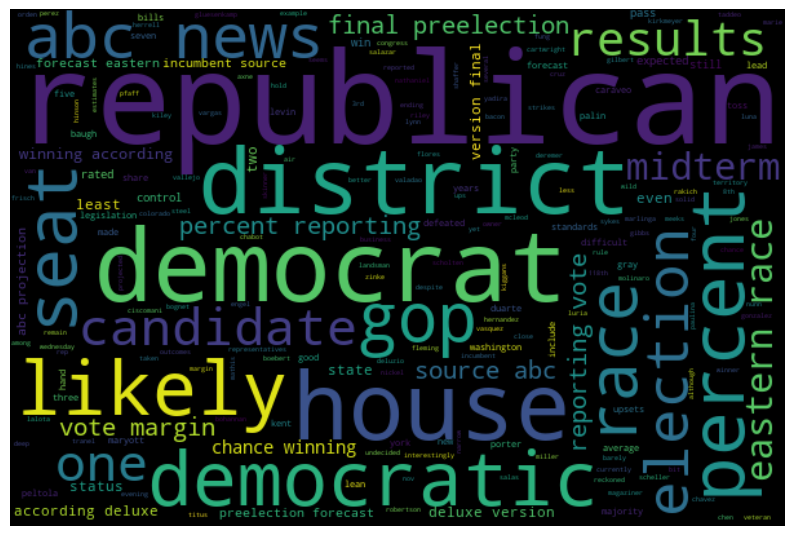

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

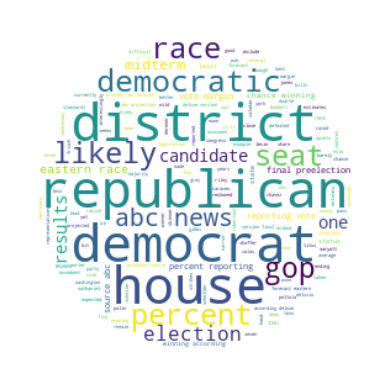

In [61]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Häufigkeitsverteilungen

In [62]:
# Packages downloaden
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanelaslani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [64]:
# Wörter tokenisieren
words_tokens = nltk.word_tokenize(all_words)

In [65]:
# Funktion FreqDist nutzen und Ergebnisse als fd speichern
fd = FreqDist(words_tokens)

In [66]:
fd

FreqDist({'republicans': 18, 'house': 14, 'percent': 14, 'abc': 11, 'democrats': 11, 'republican': 11, 'districts': 10, 'forecast': 10, 'democratic': 9, 'likely': 9, ...})

### Häufigste Wörter

In [67]:
# 3 häufigste Wörter
top_3 = fd.most_common(n=3)

In [68]:
top_3

[('republicans', 18), ('house', 14), ('percent', 14)]

In [69]:
# Die 3 häufigsten Wörter als Tabelle anzeigen
fd.tabulate(3)

republicans       house     percent 
         18          14          14 


### Diagramm häufigste Wörterr

In [72]:
# 10 häufigste Wörter beibehalten
top_10 = fd.most_common(10)

top_10

[('republicans', 18),
 ('house', 14),
 ('percent', 14),
 ('abc', 11),
 ('democrats', 11),
 ('republican', 11),
 ('districts', 10),
 ('forecast', 10),
 ('democratic', 9),
 ('likely', 9)]

In [73]:
# Erstellen eines pandas DataFrame aus dem dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
abc,11
democratic,9
democrats,11
districts,10
forecast,10
house,14
likely,9
percent,14
republican,11
republicans,18


In [74]:
# Index zurücksetzen, um den Index in eine Spalte umzuwandeln
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,abc,11
1,democratic,9
2,democrats,11
3,districts,10
4,forecast,10
5,house,14
6,likely,9
7,percent,14
8,republican,11
9,republicans,18


In [75]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x="value",
    y="index"
)

/Users/sanelaslani/opt/anaconda3/envs/webscraping/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [76]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)